In [ ]:
from google.colab import drive

import os


drive.mount(r'/content/MyDrive')

data_path = "/content/MyDrive/MyDrive/Colab_Notebooks/Khmlichi/TP3"

# Change the working directory
os.chdir(data_path)

# Exercice 1 : Analyse d’une image
1. Choisissez une image de votre choix (ex : image.jpg).
2. Affichez-la en utilisant OpenCV.
3. Convertissez-la en niveaux de gris et affichez le résultat.
4. Appliquez un filtre de détection de contours (Canny) et affichez le résultat.
Lecture et affichage d’une image :

## This code only accecible in google collab

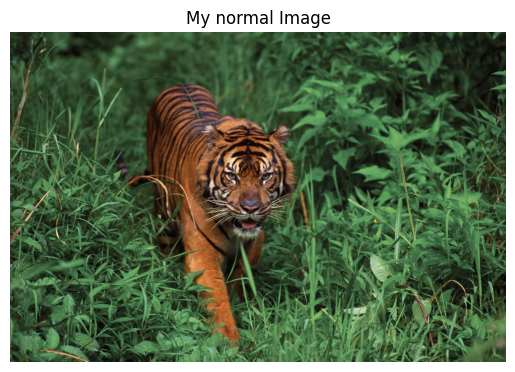

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import osw

image_path = "images/image.jpeg"
image = cv2.imread(image_path)

if image is None:
    print(f"Error: Could not load image from {image_path}. Please check the file path.")
else:

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.imshow(image_rgb)

    plt.title("My normal Image")
    plt.axis('off')
    plt.show()

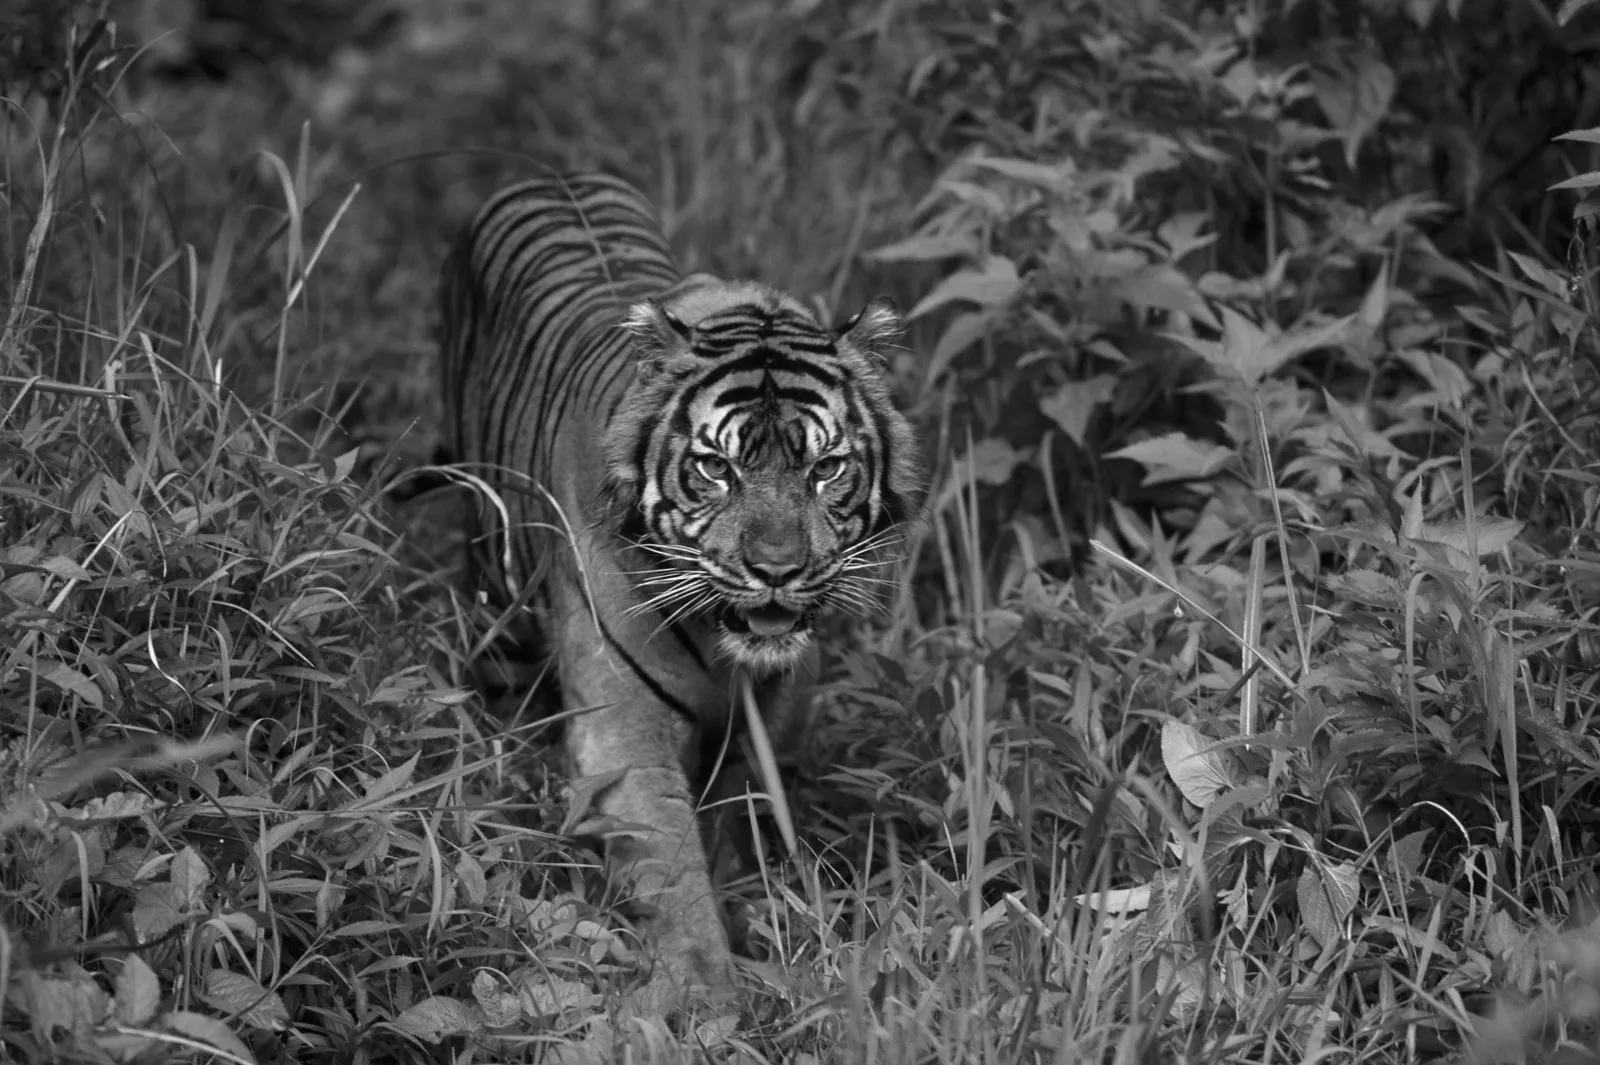

In [ ]:
# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

cv2_imshow(gray_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

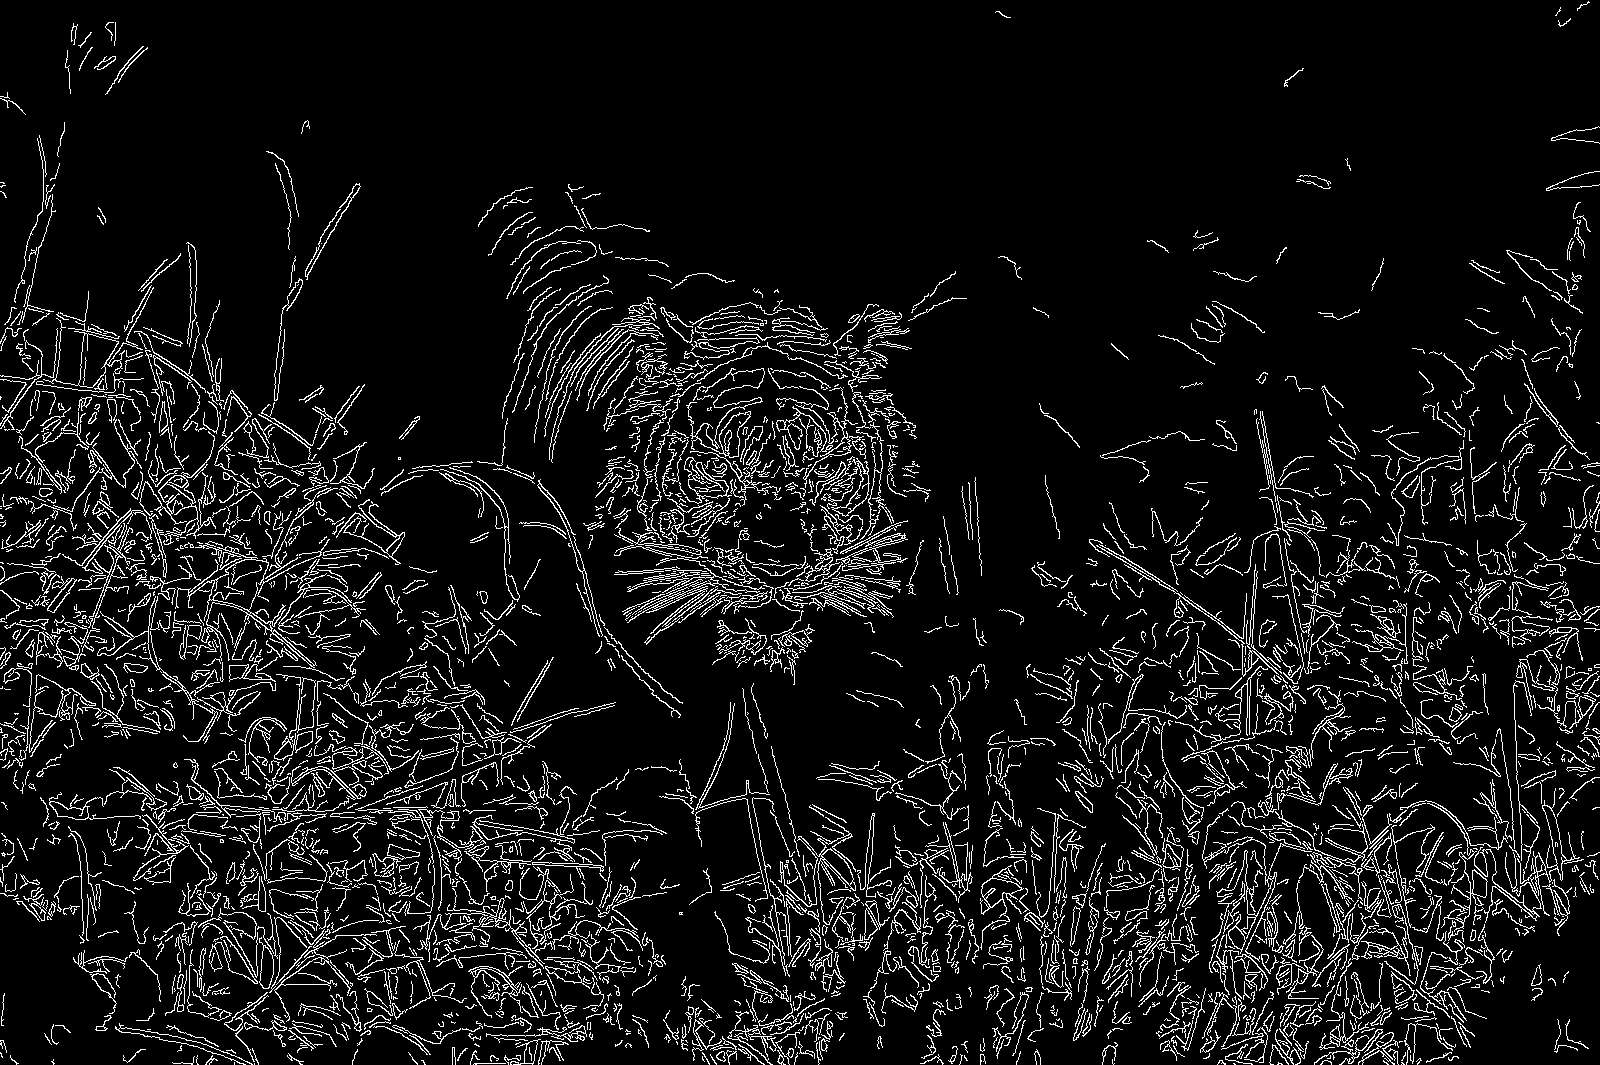

In [ ]:
import cv2


gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(gray_image, 100, 200)

cv2_imshow(edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Reponse

1. matrice = tableau 2D ou 3D → chaque pixel a 3 valeurs (BGR) = intensité bleu, vert, rouge  
2. niveaux de gris = 1 seule valeur par pixel → + rapide à traiter, utile pour détection de contours, visages, etc.

# Partie 2 : Traitement d’images et vidéos avec OpenCV

# Exercice 2 : Lecture vidéo / webcam

1. Affichez la vidéo de votre webcam.
2. Ajoutez un filtre pour convertir la vidéo en niveaux de gris en temps réel.
3. Fermez la vidéo quand l’utilisateur appuie sur q.

## This code only run for desktop setup because have inaccebility to webcam

In [ ]:
cap = cv2.VideoCapture(0)
while True :
    ret, frame = cap.read()
    if not ret :
        break
    cv2.imshow('Webcam',frame)
    if cv2.waitKey(1) & 0xFF==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

### Reponse :
si on mets une vidéo à la place de la webcam :  
– `cv2.VideoCapture("video.mp4")` lit le fichier image par image  
– `ret` devient `False` à la fin → boucle stop  
– on peux faire pause, rejouer, analyser chaque frame  
– utile pour tester algo sans webcam, + stable, + contrôlable

# Partie 3 : Détection et segmentation d’objets avec Detectron2

# Exercice 3 : Détection d’objets
1. Chargez une image contenant plusieurs objets (image_objects.jpg).
2. Utilisez un modèle pré-entraîné Mask R-CNN de Detectron2 pour détecter et segmenter
les objets.
3. Affichez l’image avec les masques colorés et les étiquettes.

## This code only accecible in google collab

In [ ]:
!pip install -U git+https://github.com/facebookresearch/detectron2.git


  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-2p5keiwh
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-2p5keiwh
  Resolved https://github.com/facebookresearch/detectron2.git to commit a9c0821a12ad353fb2a96f019515990d5460c5ac
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.5/83.5 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 56.3 MB/s eta 0:00:00
  Created wheel for detectron2: filename=detectron2-0.6-cp312-cp312-linux_x86_64.whl size=6733254 sha256=0341a29878f626e6f76d891fe7d846851c851cc613c4509f9532850152f47b90
  Stored in directory: /tmp/pip-ephem-wheel-cache-ygn4lmr2/wheels/d3/6e/bd/1969578f1456a6be

select whatever image to detect what you want


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Jim_Carrey_2010.jpg to Jim_Carrey_2010 (1).jpg
Saving Jim_Carrey_2008.jpg to Jim_Carrey_2008 (1).jpg
Saving different-things-3153107.webp to different-things-3153107 (1).webp
Saving images.jpg to images (2).jpg
Saving PC-Ratons.jpeg to PC-Ratons.jpeg
Saving people1.jpg to people1.jpg
Saving Sumatran-tiger.jpeg to Sumatran-tiger (1).jpeg
Saving mt_ulm_dsc_6637_sphaeronycteris_toxophyllum_adult.jpg to mt_ulm_dsc_6637_sphaeronycteris_toxophyllum_adult (1).jpg
Saving bats-photographed-by-jose-g-martinez-fonseca-v0-4ksq7ketrixf1.webp to bats-photographed-by-jose-g-martinez-fonseca-v0-4ksq7ketrixf1 (1).webp
Saving people2.jpg to people2 (1).jpg
Saving people.jpg to people (1).jpg


In [ ]:
import cv2
import torch
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from google.colab.patches import cv2_imshow
from google.colab import files
import os

# Configuration du modèle pré-entraîné
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file(
"COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"
))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(
"COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"
)
predictor = DefaultPredictor(cfg)


if 'uploaded' in locals() and uploaded:
    for filename in uploaded.keys():
        print(f"Processing image: {filename}")
        # Save the uploaded file to a temporary location
        with open(filename, "wb") as f:
            f.write(uploaded[filename])

        # Load the image
        img = cv2.imread(filename)

        if img is None:
            print(f"Error: Could not load image from {filename}. Skipping.")
            continue

        try:
            # Prédiction
            outputs = predictor(img)

            # Visualisation
            v = Visualizer(img[:, :, ::-1],
                           MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
            out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

            # Display the result
            print(f"Object detection results for {filename}:")
            cv2_imshow(out.get_image()[:, :, ::-1])

            # Clean up the temporary file
            os.remove(filename)

        except Exception as e:
            print(f"An error occurred while processing {filename}: {e}")

else:
    print("No files were uploaded. Please run the file upload cell (km-AXEG02g88) and upload images.")

Output hidden; open in https://colab.research.google.com to view.

### Reponse

1. objets détectés = ceux que le modèle reconnaît avec score > seuil (ex : personne, voiture, animal…). Chaque détection a une boîte + un score de confiance.  
2. si tu augmentes `SCORE_THRESH_TEST` → seules les détections très sûres s’affichent (moins d’objets, + précis) ; si tu baisses le seuil → + d’objets détectés (mais + de faux positifs possibles).  

# Partie 4 : Détection et reconnaissance faciale avec Dlib



# Exercice 4 : Détection faciale
1. Chargez une image contenant un ou plusieurs visages (people.jpg).
2. Détectez tous les visages et entourez-les de rectangles verts.

In [ ]:
import dlib
import cv2
from google.colab.patches import cv2_imshow
from google.colab import files
import os

detector = dlib.get_frontal_face_detector()


if 'uploaded' in locals() and uploaded:
    for filename in uploaded.keys():
        # Check if "people" is in the filename (case-insensitive)
        if "people" in filename.lower():
            print(f"Processing image with 'people' in filename: {filename}")

            with open(filename, "wb") as f:
                f.write(uploaded[filename])

            img = cv2.imread(filename)

            if img is None:
                print(f"Error: Could not load image from {filename}. Skipping.")
              # Clean up the temporary file even if loading fails
                if os.path.exists(filename):
                    os.remove(filename)
                continue

            try:
                gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                faces = detector(gray)

                if len(faces) == 0:
                    print(f"No faces detected in {filename}.")
                else:
                    for face in faces:
                        x, y, w, h = face.left(), face.top(), face.width(), face.height()
                        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

                    # Display the result
                    print(f"Face detection results for {filename}:")
                    cv2_imshow(img)

                os.remove(filename)

            except Exception as e:
                print(f"An error occurred while processing {filename}: {e}")
                if os.path.exists(filename):
                    os.remove(filename)

else:
    print("No files were uploaded. Please run the file upload cell (km-AXEG02g88) and upload images.")

Output hidden; open in https://colab.research.google.com to view.

# Exercice 5 : Reconnaissance faciale
1. Chargez une image de référence (ref.jpg) et une image test (test.jpg).
2. Comparez les visages et indiquez si c’est la même personne.

In [ ]:
!pip install mediapipe==0.10.21 opencv-python-headless==4.11.0.46 matplotlib numpy==1.26.4
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
mp_face_detection = mp.solutions.face_detection

def get_face_embedding(image_path):
    """Detect face, crop, resize, and return a normalized embedding vector."""
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: {image_path} not found!")
        return None, None

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    with mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.5) as face_detection:
        results = face_detection.process(image_rgb)

        if not results.detections:
            print(f"No face found in {image_path}")
            return None, image_rgb

        bboxC = results.detections[0].location_data.relative_bounding_box
        h, w, _ = image_rgb.shape
        x1 = max(int(bboxC.xmin * w), 0)
        y1 = max(int(bboxC.ymin * h), 0)
        x2 = min(x1 + int(bboxC.width * w), w)
        y2 = min(y1 + int(bboxC.height * h), h)

        face_crop = image_rgb[y1:y2, x1:x2]
        face_crop = cv2.resize(face_crop, (128, 128))

        # Flatten and normalize
        embedding = face_crop.flatten().astype(np.float32)
        embedding /= np.linalg.norm(embedding) + 1e-10

        return embedding, image_rgb

def cosine_similarity(vec1, vec2):
    """Compute cosine similarity between two vectors."""
    return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))


In [ ]:
ref_image_path = "Jim_Carrey_2008.jpg"
test_image_path = "Jim_Carrey_2010.jpg"

# Get embeddings
enc_ref, img_ref = get_face_embedding(ref_image_path)
enc_test, img_test = get_face_embedding(test_image_path)

# Compare faces
if enc_ref is not None and enc_test is not None:
    similarity = cosine_similarity(enc_ref, enc_test)
    match = similarity > 0.6  # adjust threshold if needed

    print("---" * 10)
    print(f"Même personne ? {match} (similarity={similarity:.2f})")
    print("---" * 10)


Reponse :
1. Si l’image test contient plusieurs visages → `face_encodings()` retourne une liste d’encodages → faut comparer chaque visage test avec celui de référence → résultat = plusieurs True/False selon les visages détectés.  
2. En conditions réelles (lumière faible, angles différents, expressions faciales, accessoires comme lunettes) → précision ↓ car le modèle est sensible aux variations → bon si visage bien visible, frontal, éclairé ; moins fiable si ombre, profil ou visage partiellement caché.  
